In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
data=pd.read_csv(r"C:\Users\khich\Downloads\Iris.csv")

In [4]:
# Prepare the features
X = data.iloc[:, 1:5].values  # Exclude Id and Species columns

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Elbow method to find the optimal number of clusters
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

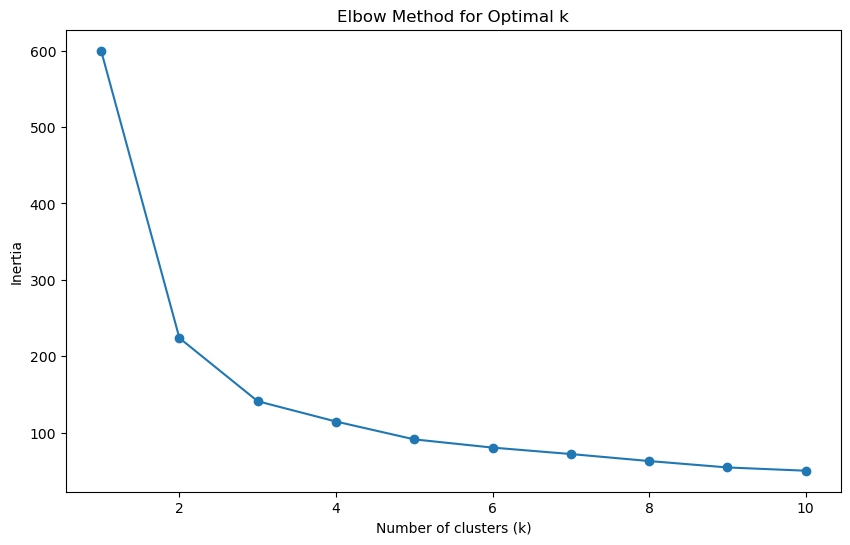

In [6]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [7]:
# Based on the elbow curve, let's choose the optimal number of clusters
optimal_k = 3  # This should be determined by examining the elbow curve

In [8]:
# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)


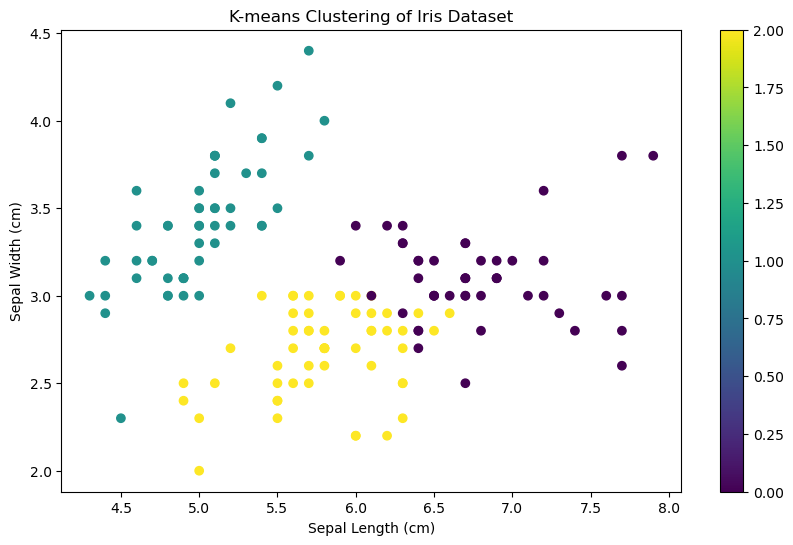

In [9]:
# Visualize the clusters (using the first two features)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-means Clustering of Iris Dataset')
plt.colorbar(scatter)
plt.show()

In [10]:
# Print the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1}: {center}")


Cluster Centers:
Cluster 1: [6.78085106 3.09574468 5.5106383  1.97234043]
Cluster 2: [5.006 3.418 1.464 0.244]
Cluster 3: [5.80188679 2.67358491 4.36981132 1.41320755]


In [11]:
# Compare clustering results with actual species
species_mapping = {label: idx for idx, label in enumerate(data['Species'].unique())}
actual_labels = data['Species'].map(species_mapping)


In [12]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [13]:
ari = adjusted_rand_score(actual_labels, cluster_labels)
ami = adjusted_mutual_info_score(actual_labels, cluster_labels)

print(f"\nAdjusted Rand Index: {ari:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")


Adjusted Rand Index: 0.6201
Adjusted Mutual Information: 0.6552
